# Imports

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [98]:
info = pd.read_csv('/kaggle/input/lendingclubkerasprojectdata/lending_club_info.csv', 
                  index_col = 'LoanStatNew')

In [99]:
info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [100]:
# Function to get the Description of the particular variable.
def feature_info(x):
    print(info.loc[x]['Description'])

In [101]:
feature_info('pub_rec_bankruptcies')

Number of public record bankruptcies


## Loading the Data

In [102]:
df = pd.read_csv('/kaggle/input/lendingclubkerasprojectdata/lending_club_loan_two.csv')

In [103]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

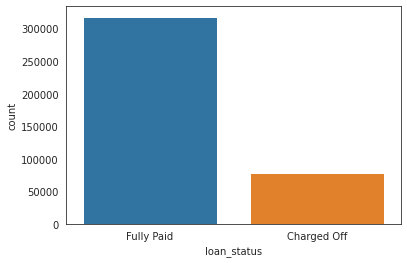

In [106]:
sns.countplot(df['loan_status'])

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

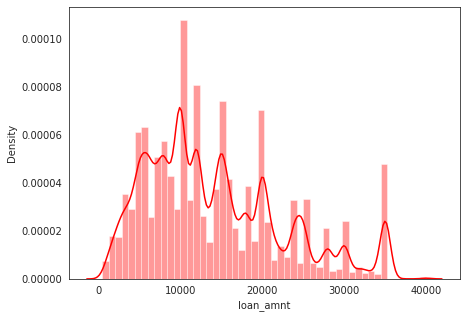

In [107]:
plt.figure(figsize = (7,5))
sns.distplot(df['loan_amnt'], color= 'red')

In [108]:
(df.corr()> 0.7)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,True,False,True,False,False,False,False,False,False,False,False,False
int_rate,False,True,False,False,False,False,False,False,False,False,False,False
installment,True,False,True,False,False,False,False,False,False,False,False,False
annual_inc,False,False,False,True,False,False,False,False,False,False,False,False
dti,False,False,False,False,True,False,False,False,False,False,False,False
open_acc,False,False,False,False,False,True,False,False,False,False,False,False
pub_rec,False,False,False,False,False,False,True,False,False,False,False,False
revol_bal,False,False,False,False,False,False,False,True,False,False,False,False
revol_util,False,False,False,False,False,False,False,False,True,False,False,False
total_acc,False,False,False,False,False,False,False,False,False,True,False,False


<AxesSubplot:>

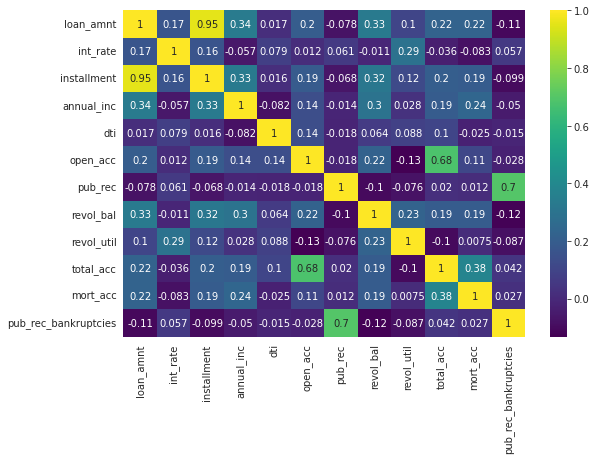

In [109]:
plt.figure(figsize = (9,6))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

#### We see high correlation between installment and loan_amnt columns.

In [110]:
feature_info('installment')
feature_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

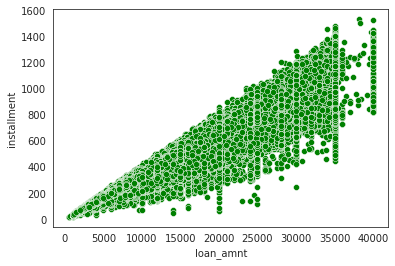

In [111]:
sns.scatterplot(x = 'loan_amnt', y = 'installment', data = df, color = 'green')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

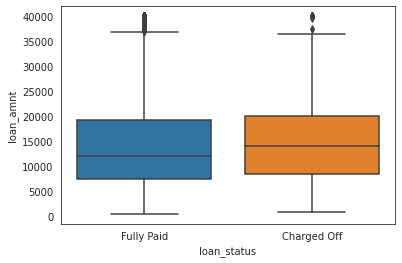

In [112]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [113]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [114]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [115]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

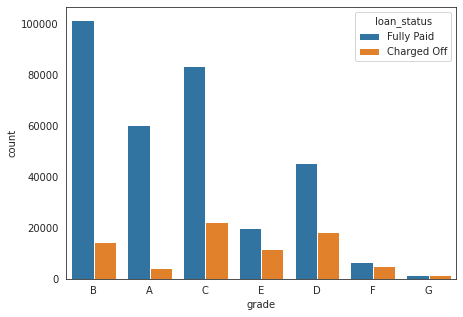

In [120]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

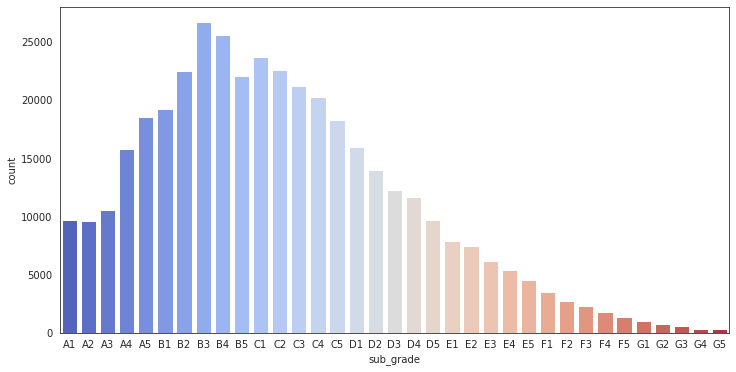

In [117]:
sorted_subgrades = sorted(df['sub_grade'].unique())
plt.figure(figsize = (12, 6))
sns.countplot(df['sub_grade'], order = sorted_subgrades, palette = 'coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

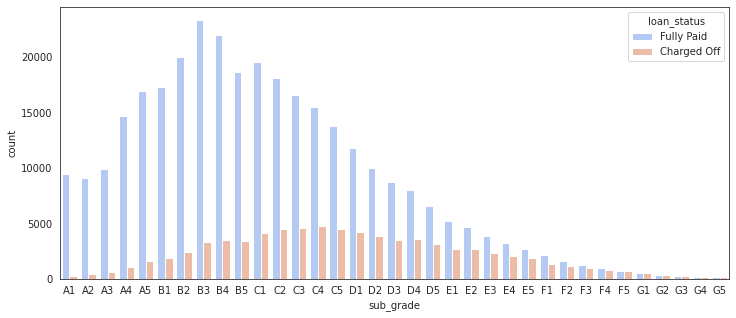

In [124]:
sorted_subgrades = sorted(df['sub_grade'].unique())
plt.figure(figsize = (12, 5))
sns.countplot(df['sub_grade'], order = sorted_subgrades, palette = 'coolwarm', hue = 'loan_status',
             data = df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

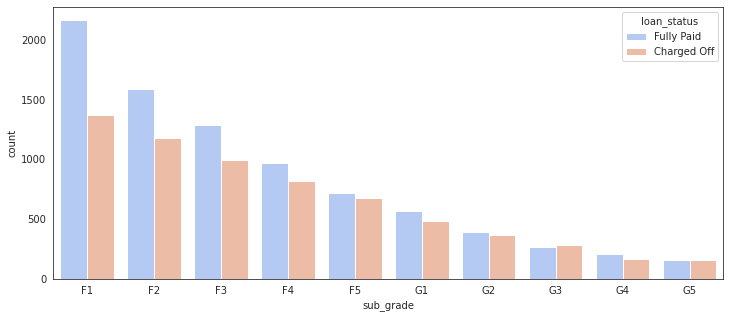

In [127]:
f_g_grades = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sorted_subgrades = sorted(f_g_grades['sub_grade'].unique())
plt.figure(figsize = (12, 5))
sns.countplot(f_g_grades['sub_grade'], order = sorted_subgrades, palette = 'coolwarm', hue = 'loan_status',
             data = f_g_grades)

In [129]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [132]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

<AxesSubplot:>

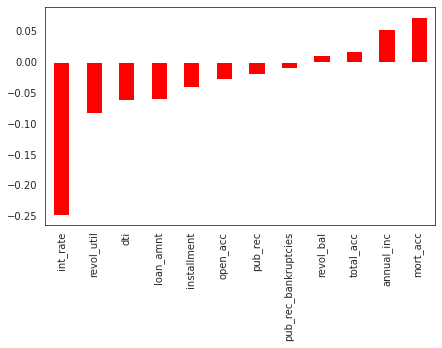

In [143]:
plt.figure(figsize = (7, 4))
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind = 'bar', color = 'red')

In [144]:
df.to_csv('viz_data.csv')